## Observations and Insights 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_mouse_df = study_results.join(mouse_metadata.set_index("Mouse ID"), on="Mouse ID")

# Display the data table for preview
study_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
study_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mices = study_mouse_df['Mouse ID'].nunique()
print(f'We have a total of {mices} mice')

We have a total of 249 mice


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = pd.DataFrame(study_mouse_df, columns=['Mouse ID', 'Timepoint'])
mice_dup_df = mice_dup.drop_duplicates()
mice_dup_df

,Mouse ID,Timepoint
0,b128,0
1,f932,0
2,g107,0
3,a457,0
4,c819,0
...,...,...
1888,r944,45
1889,u364,45
1890,p438,45
1891,x773,45


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
study_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
only_mice_df = pd.DataFrame(mice_dup, columns={'Mouse ID'})
clean_mice_df = only_mice_df.drop_duplicates()
clean_mice_df

,Mouse ID
0,b128
1,f932
2,g107
3,a457
4,c819
...,...
245,t565
246,i557
247,m957
248,f966


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df.reset_index(drop=True)

,Mouse ID
0,b128
1,f932
2,g107
3,a457
4,c819
...,...
244,t565
245,i557
246,m957
247,f966


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_df = study_mouse_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_reg = regimen_df['Tumor Volume (mm3)'].mean()
median_reg = regimen_df['Tumor Volume (mm3)'].median()
var_reg = regimen_df['Tumor Volume (mm3)'].var()
std_reg = regimen_df['Tumor Volume (mm3)'].std()
sem_reg = regimen_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
stat_regimen = pd.DataFrame({"Mean_Tumor_Vol_mm3":mean_reg,
                             "Median_Tumor_Vol_mm3":median_reg,
                             "Variance_Tumor_Vol_mm3":var_reg,
                             "STD_Tumor_Vol_mm3":std_reg,
                             "SEM_Tumor_Vol_mm3":sem_reg})
stat_regimen


,Mean_Tumor_Vol_mm3,Median_Tumor_Vol_mm3,Variance_Tumor_Vol_mm3,STD_Tumor_Vol_mm3,SEM_Tumor_Vol_mm3
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stat_reg_b = study_mouse_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
stat_reg_b

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

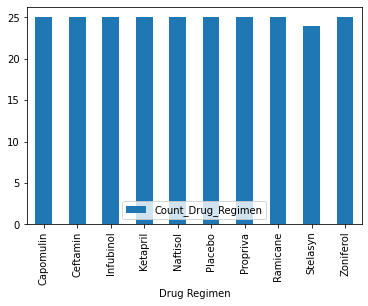

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
reg_df = mouse_metadata.groupby(['Drug Regimen'])
num_meas = reg_df['Mouse ID'].count()
drug_meas = pd.DataFrame({'Count_Drug_Regimen':num_meas})
drug_meas.plot(kind='bar')

([<matplotlib.axis.XTick at 0x1bf687bbf70>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ketapril'),
  Text(2, 0, 'Naftisol'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Stelasyn'),
  Text(5, 0, 'Ramicane'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Zoniferol'),
  Text(8, 0, 'Placebo'),
  Text(9, 0, 'Ceftamin')])

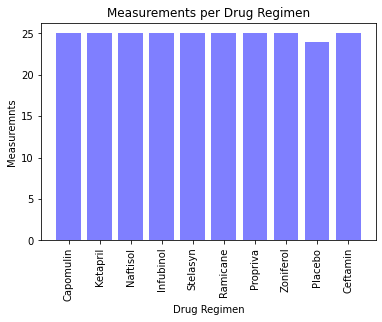

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = reg_df['Mouse ID'].count()
x_axis = np.arange(len(drugs))
plt.bar(x_axis, drugs, color='b', alpha=0.5, align="center" )
plt.title('Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Measuremnts')
tick_loc = [val for val in x_axis]
plt.xticks(tick_loc,study_mouse_df['Drug Regimen'].unique(),rotation="vertical")

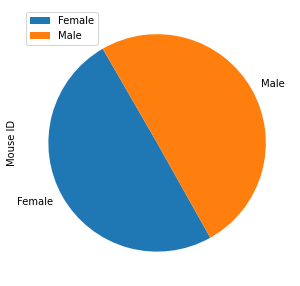

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_df = pd.DataFrame(mouse_metadata, columns={'Mouse ID','Sex'})
sex_mouse = mouse_df.groupby(["Sex"]).count().plot(kind='pie', subplots=True, startangle=120, figsize=(5,5))


ValueError: could not convert string to float: 'Female'

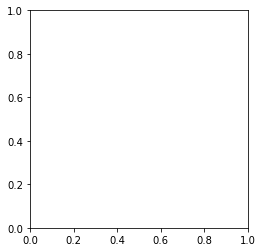

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse = mouse_metadata.groupby(['Sex'])
my_lab = 'Male','Female'
plt.pie(mouse,labels=my_lab)
plt.title('Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_df = study_mouse_df.groupby("Mouse ID")["Timepoint"].agg(max_time='max')
time_df

,max_time
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [24]:

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = study_mouse_df.groupby('Mouse ID')[['Timepoint', 'Tumor Volume (mm3)']].agg('max')
tumor_mouse_df = mouse_metadata.merge(tumor_df, left_on="Mouse ID", right_index=True)
tumor_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,45.000000
1,s185,Capomulin,Female,3,17,45,45.000000
2,x401,Capomulin,Female,16,15,45,45.473753
3,m601,Capomulin,Male,22,17,45,45.000000
4,g791,Ramicane,Male,11,16,45,45.851531
...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712
245,z435,Propriva,Female,12,26,10,48.710661
246,z581,Infubinol,Female,24,25,45,62.754451
247,z795,Naftisol,Female,13,29,45,65.741070


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = filt_reg_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
bool_reg = tumor_mouse_df['Drug Regimen'].isin(regimen)
filt_reg_df = tumor_mouse_df[bool_reg] 
filt_reg_df
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
quarts = tumor_vol.quantile([.25,.5,.75])
lowq = quarts[0.25]
upq = quarts[0.75]
iqr = upq-lowq

print(f"The lower quartile of volume is: {lowq}")
print(f"The upper quartile of volume is: {upq}")
print(f"The median volume is: {quarts[0.5]}")

low_bound = lowq - (1.5*iqr)
up_bound = upq + (1.5*iqr)

print(f"Values below {low_bound} could be outlier")
print(f"Values above {up_bound} could be outlier")

The lower quartile of volume is: 45.5098442875
The upper quartile of volume is: 59.930261755000004
The median volume is: 46.860058175
Values below 23.87921808625 could be outlier
Values above 81.56088795625001 could be outlier


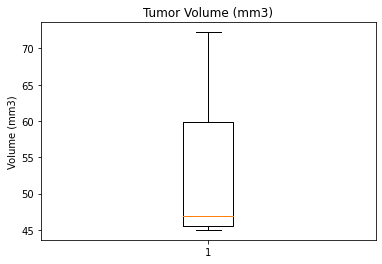

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
     
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
ax1.set_ylabel('Volume (mm3)')
plt.show()

## Line and Scatter Plots

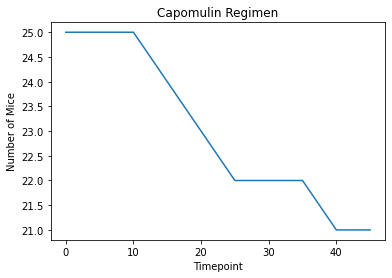

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug = ["Capomulin"]
bool_capo = study_mouse_df['Drug Regimen'].isin(drug)
capo_df = study_mouse_df[bool_capo]
time_group = capo_df.groupby('Timepoint')
count_time = time_group['Mouse ID'].count()
count_chart = count_time.plot()
count_chart.set_xlabel("Timepoint")
count_chart.set_ylabel("Number of Mice")
plt.title("Capomulin Regimen")
plt.show()

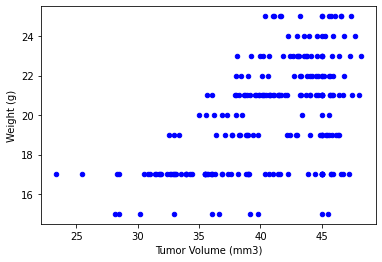

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ax2 = capo_df.plot.scatter(x='Tumor Volume (mm3)', y='Weight (g)', c='Blue')

## Correlation and Regression

In [38]:
capo_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


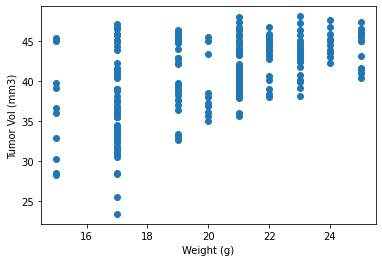

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(capo_df.iloc[:,7], capo_df.iloc[:,2])
plt.ylabel('Tumor Vol (mm3)')
plt.xlabel('Weight (g)')
plt.show()

In [44]:
tumor = capo_df.iloc[:,2]
weight = capo_df.iloc[:,7]
correlat = st.pearsonr(tumor, weight)
print(f"The correlation between the weight and the Tumor Volume is {round(correlat[0],2)}")

The correlation between the weight and the Tumor Volume is 0.53


The r-squared is 0.2763600223455914


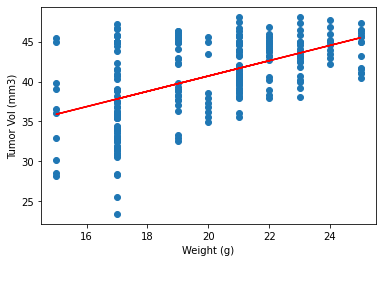

In [61]:
x_val = capo_df['Weight (g)']
y_val = capo_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "r-")
plt.annotate(line_eq,(15,15),fontsize=20,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Vol (mm3)')
print(f"The r-squared is {rvalue**2}")
plt.show()